Exercise 1: 
<br> (a) Create a Bayesian Belief Network with binary or discrete variables using pgmpy or PyMC3. Follow the example covered in class.
<br> (b) Use variable elimination to derive a conditional probability expression using your previous example. Show this is consistent with what you obtain from the package. You should do a variable elimination example for a simple example like that shown in class.

### Bayesian Model Using PGMPY

Problem - A person enters the house and sees cooked food on the table. There are two posibilities for this either wife (W) or Daughter (D) or both have prepared the meal. The husband has some prior belief of 0.7 that it is the wife and 0.3 that it is the daughter. It is possible that neither of them have prepared the meal. It is also possible that both of them prepared it together. The probabilities are independent in a way such that P(W, D) = P(W)P(D). The prior knowledge can be formulated as below 

P(W) = 0.7
<br>P(D) = 0.3
<br>P(W, D) = P(W)P(D)

Besides this he also knows the following,

P($F$|$\bar{W}$,$\bar{D}$) = 0.1
<br>P($F$|$\bar{W}$,$D$) = 0.6
<br>P($F$|$W$,$\bar{D}$) = 0.4
<br>P($F$|$W$,$D$) = 0.3

What is the probability that the wife prepared the food? P(W|F=1)

I am using the pgmpy package for this.
    

In [3]:
from pgmpy.models import BayesianModel as bysmodel
from pgmpy.factors.discrete import TabularCPD as tcpd # TabularCPD - Tabular Conditional Probability Distribution

In [6]:
#Defining the model with connections between random variables
model = bysmodel([('W', 'F'), ('D', 'F')]);

#Defining prior
priorW = tcpd(variable='W', variable_card=2, values=[[0.3, 0.7]])
priorD = tcpd(variable='D', variable_card=2, values=[[0.7, 0.3]])

#Defining conditional probability
cpdK = tcpd(variable='F', variable_card=2, evidence=['W', 'D'], evidence_card=[2,2], 
           values=[[0.9, 0.6, 0.4, 0.7], 
                   [0.1, 0.4, 0.6, 0.3]])

#Adding the probabilities 
model.add_cpds(priorW, priorD, cpdK)

In [7]:
model.check_model()

True

In [8]:
print(model.get_cpds('F'))

╒═════╤═════╤═════╤═════╤═════╕
│ W   │ W_0 │ W_0 │ W_1 │ W_1 │
├─────┼─────┼─────┼─────┼─────┤
│ D   │ D_0 │ D_1 │ D_0 │ D_1 │
├─────┼─────┼─────┼─────┼─────┤
│ F_0 │ 0.9 │ 0.6 │ 0.4 │ 0.7 │
├─────┼─────┼─────┼─────┼─────┤
│ F_1 │ 0.1 │ 0.4 │ 0.6 │ 0.3 │
╘═════╧═════╧═════╧═════╧═════╛


### Bayesian Inference 

In [9]:
from pgmpy.inference import VariableElimination as proc

What is the probability that the wife prepared the food? P(W|F=1)

In [11]:
infer = proc(model)
print(infer.query(['W'], evidence={'F':1}) ['W'])

╒═════╤══════════╕
│ W   │   phi(W) │
╞═════╪══════════╡
│ W_0 │   0.1377 │
├─────┼──────────┤
│ W_1 │   0.8623 │
╘═════╧══════════╛


What is the probability that the daughter prepared the food? P(D|F=1)

In [12]:
print(infer.query(['D'], evidence={'F':1}) ['D'])

╒═════╤══════════╕
│ D   │   phi(D) │
╞═════╪══════════╡
│ D_0 │   0.7609 │
├─────┼──────────┤
│ D_1 │   0.2391 │
╘═════╧══════════╛


In [18]:
print(infer.query(['W'], evidence={'F':1}) ['W'])

╒═════╤══════════╕
│ W   │   phi(W) │
╞═════╪══════════╡
│ W_0 │   0.1377 │
├─────┼──────────┤
│ W_1 │   0.8623 │
╘═════╧══════════╛


Doing a variable elimination inference for P(W | F = 1).

$P(W|F)$ = $\sum_{D}P(W,D|F)$ <br>
<br>        = $\sum_{D}$ $\dfrac{P(W,D,F)}{P(F)}$ <br>
<br>        = $\dfrac{P(W)\sum_{D}P(F|W, D)P(D)}{\sum_{W}P(W)\sum_{D}P(F|W, D)}$ <br>
<br>        = $\dfrac{0.7 X ((0.3 X 0.3) + (0.6 X 0.7))}{0.7 X ((0.3 X 0.3) + (0.6 X 0.7)) + 0.3 X ((0.4 X 0.3) + (0.1 X 0.7))}$ <br>
<br>        = $\dfrac{0.357}{0.357+0.057}$<br>
<br>        = $0.8623$<br>

This is equal to the number got from pgmpy.



Doing a variable elimination inference for P(D | F = 1).

$P(D|F)$ = $\sum_{W}P(W,D|F)$ <br>
<br>        = $\sum_{W}$ $\dfrac{P(W,D,F)}{P(F)}$ <br>
<br>        = $\dfrac{P(D)\sum_{W}P(F|W, D)P(W)}{\sum_{D}P(D)\sum_{W}P(F|W, D)}$ <br>
<br>        = $\dfrac{0.3 X ((0.3 X 0.7) + (0.4 X 0.3))}{0.3 X ((0.3 X 0.7) + (0.4 X 0.3)) + 0.7 X ((0.6 X 0.7) + (0.1 X 0.3))}$ <br>
<br>        = $\dfrac{0.099}{0.099+0.315}$<br>
<br>        = $0.2391$<br>

This is equal to the number got from pgmpy.

The above is an example of binary variables. I have also done an example for discrete values. 

### 2) Bayesian Model Using PYMC3

Jhon (J) comes home and notices the door to be open. It can either be that the wife - Stella (S) is home or the maid (M) has left the door open or there is a burglary. Next, he notices that there is no car parked at the driveway so he concludes that his wife is not back and rushes into the house to see that everythng is as it is and clean. So, he concludes that the maid must have left the door open. 

### Making the model

We can make the situation by using probability by following a general approach. The variables included in the model are - 
<br>
D - {True, False} Corresponds to whether the door is open or not. <br>
S - {True, False} Corresponds to whether Stella is home or not. <br>
M - {True, False} Corresponds to whether Maid has left the door open or not. <br>
B - {True, False} Corresponds to whether there is a burglary or not. <br>
C - {True, False} Corresponds to whether there is a car present in the driveway. <br>
I - {True, False} Corresponds to whether items are missing at home or not. <br>

A model of Jhon's world would be represented as P(D, S, M, B, C, I). The order is irrlevant.

The model can be shown as below - 

P(D, S, M, B, C, I) = P(D|M, S, B) P(C|S) P(I|B) P(B) P(S) P(M)

<img src="Open Door.png" width="300">

We assume the following priors - 
P(B = True) is 0.2, P(S = True) = 0.6, P(M = True) = 0.3, P(I = True | B = True) = 0.8 (Only cash could be stolen), P(I = True | B = False) = 0, P(C = True | S = True) = 0.7 (She might have come home in public transport), P(C = True | S = False) = 0.2 (Some other car can be parked at the driveway), P(D = true | M = True, S = False, B = False) = 1 and so on for other combinations of M, S and B either one of them being true. When all are false the door is closed.

I have used the package PyMC3 for this to build the belief network.  

In [19]:
import pymc3

model = pymc3.Model()

To define descrete variables in pymc3 we need to use the bernouli distribution, categorical distribution and need to do some work around using with function pymc3.math.switch.

Bernoulli distribution is defined as

$$ f(x | p) = p^x (1 - p)^{1 - x} $$

Where $x$ is a binary variable, it's a natural way to represent binary random variables. In this way, we can define variable $S$, $B$ and $M$ as following

<center>
P(B = true) = 0.2 <br>
P(S = true) = 0.6 <br>
P(M = true) = 0.3
</center>

In [20]:
from pymc3 import Bernoulli

with model:
    Burglary = Bernoulli('Burglary', 0.2)
    Stella = Bernoulli('Stella', 0.6)
    Maid = Bernoulli('Maid', 0.3)

Variable $D$, $C$ and $I$ are defined by conditional probability, which cannot directly expressed as a Bernoulli distribution. Here we use a work around with function *pymc3.math.switch*, which create a *TensorVariable* can do *if-then-else* selection in place.


<center>
    P(I = true | B = true) = 0.8 <br>
    P(I = true | B = false) = 0 <br>
<br>
    P(C = true | S = true) = 0.7 <br>
    P(C = true | S = false) = 0.2 <br>
<br>    
    P(D = true | M = true, S, B) = 1.0 <br>
    P(D = true | M = false, S = false, B = false) = 0 <br>
    P(D = true | M = false, S = true, B = false) = 0.4
</center>


In [21]:
from pymc3.math import switch

with model:
    Item = Bernoulli('Item', switch(Burglary, 0.8, 0))
    Car = Bernoulli('Car', switch(Stella, 0.7, 0.2))
    # use nested switch function to deal with multiple conditions
    Door = Bernoulli('Door', switch(Maid, 1, switch(Stella, 0.4, 0)))

Multiprocess sampling (2 chains in 2 jobs)
BinaryGibbsMetropolis: [Burglary, Stella, Maid, Item, Car, Door]
100%|██████████| 20500/20500 [00:16<00:00, 1263.90it/s]
The number of effective samples is smaller than 25% for some parameters.


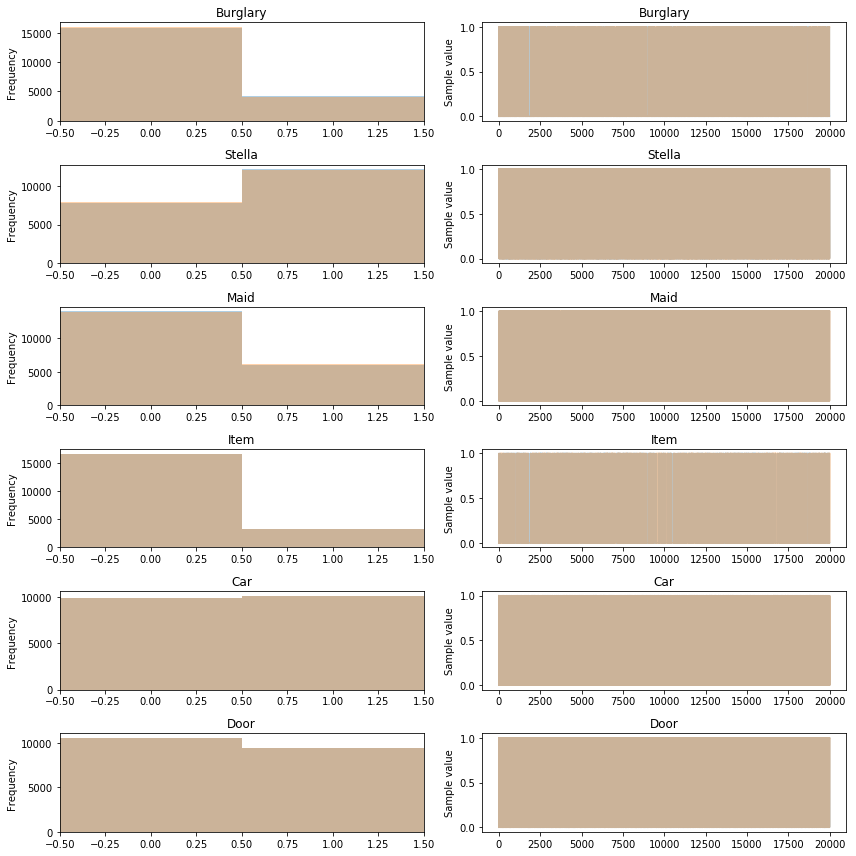

In [22]:
%matplotlib inline

nsamples = 20000

with model:
    trace = pymc3.sample(nsamples, chains=2)
    pymc3.traceplot(trace)

In [23]:
def calcCondProb(trace, event, cond):
    # find all samples satisfy conditions
    for k, v in cond.items():
        trace = [smp for smp in trace if smp[k] == v]
    # record quantity of all samples fulfill condition
    nCondSample = len(trace)
    # find all samples satisfy event
    for k, v in event.items():
        trace = [smp for smp in trace if smp[k] == v]
    # calculate conditional probability
    return len(trace) / nCondSample

What is the probability that a car is present given that the door is open?

In [25]:
print('P(C = true | D = true) = ', 
      calcCondProb(trace, {'Car' : 1}, {'Door' : 1}))

P(C = true | D = true) =  0.569906088424607


What is the probability that a car is present given that the door is open and Stella is not home?

In [26]:
print('P(C = true | D = true, S = false) = ', 
      calcCondProb(trace, {'Car' : 1}, {'Door' : 1, 'Stella' : 0}))

P(C = true | D = true, S = false) =  0.19090536665301105


What is the probability that Stella is home given that the door is open?

In [27]:
print('P(S = true | D = true) = ', 
      calcCondProb(trace, {'Stella' : 1}, {'Door' : 1}))

P(S = true | D = true) =  0.742429038725335


What is the probability that the maid left the door open given that the door is open?

In [28]:
print('P(M = true | D = true) = ', 
      calcCondProb(trace, {'Maid' : 1}, {'Door' : 1}))

P(M = true | D = true) =  0.6437691252506067


What is the probability that there has been a burglary given that the door is open?

In [29]:
print('P(B = true | D = true) = ', 
      calcCondProb(trace, {'Burglary' : 1}, {'Door' : 1}))

P(B = true | D = true) =  0.19869156906193944


What is the probability that the maid left the door open given that the door is open, car is not present in the driveway and all the items are as they are? - This is the scenario that Jhon experiences and we can see that Jhon's conclusion has the highest probability. 

In [38]:
print('P(M = true | D = true, C = false, Item = False) = ', 
      calcCondProb(trace, {'Maid' : 1}, {'Door' : 1, 'Car' : 0, 'Item' : 0}))

P(M = true | D = true, C = false, Item = False) =  0.7494158878504673


What is the probability that there was a burglary given that the door is open, car is not present in the driveway and all the items are as they are?

In [37]:
print('P(B = true | D = true, C = false, Item = False) = ', 
      calcCondProb(trace, {'Burglary' : 1}, {'Door' : 1, 'Car' : 0, 'Item' : 0}))

P(B = true | D = true, C = false, Item = False) =  0.0481892523364486


What is the probability that stella is back home given that the door is open, car is not present in the driveway and all the items are as they are?

In [36]:
print('P(S = true | D = true, C = false, Item = False) = ', 
      calcCondProb(trace, {'Stella' : 1}, {'Door' : 1, 'Car' : 0, 'Item' : 0}))

P(S = true | D = true, C = false, Item = False) =  0.5175233644859814


What is the probability that there was a burglary given that the door is open, car is not present in the driveway and all the items are not as they were before?

In [39]:
print('P(B = true | D = true, C = false, Item = True) = ', 
      calcCondProb(trace, {'Burglary' : 1}, {'Door' : 1, 'Car' : 0, 'Item' : 1}))

P(B = true | D = true, C = false, Item = True) =  1.0
